In [47]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import statsmodels.api as sm
import numpy as np
import io
import scipy.stats as stats
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


data=pd.read_csv('base de datos clinica.csv')

In [48]:
data.isnull().sum()

Id          0
P1          0
P1.1        0
P1.2        0
P1.3        0
P2.1        2
P2.2        0
P3.1        0
P3.2        0
P3.3        0
P3.4        0
P3.5        0
P3.6        0
P3.7        0
P3.8        0
P3.9        0
P3.10       0
p4.1        0
p4.2        0
p4.3        0
p4.4        0
p4.5        0
p4.6        0
p4.7        0
p4.7.1      0
P5          2
P6.1       85
P6.2      133
P6.3      181
P6.4      172
P6.5      185
P6.6      170
P6.7      196
P6.8      190
P6.9      169
P6.10     190
P7          0
P8          0
P9          0
P10         0
P12         0
dtype: int64

In [11]:
data.dropna(subset=['P5'], inplace= True)

In [13]:
data.isnull().sum()

Id          0
P1          0
P1.1        0
P1.2        0
P1.3        0
P2.1        2
P2.2        0
P3.1        0
P3.2        0
P3.3        0
P3.4        0
P3.5        0
P3.6        0
P3.7        0
P3.8        0
P3.9        0
P3.10       0
p4.1        0
p4.2        0
p4.3        0
p4.4        0
p4.5        0
p4.6        0
p4.7        0
p4.7.1      0
P5          0
P6.1       84
P6.2      132
P6.3      180
P6.4      170
P6.5      184
P6.6      169
P6.7      194
P6.8      188
P6.9      167
P6.10     188
P7          0
P8          0
P9          0
P10         0
P12         0
dtype: int64

In [14]:
data.head()

,Id,P1,P1.1,P1.2,P1.3,P2.1,P2.2,P3.1,P3.2,P3.3,...,P6.6,P6.7,P6.8,P6.9,P6.10,P7,P8,P9,P10,P12
0,1,1.0,,Centro de salud,1.0,0.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,150.00,1.0,4.0,3,2.0,4.0
1,2,1.0,,Dr. José Pérez,1.0,0.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,4.0,3,2.0,4.0
2,3,1.0,,,1.0,0.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,4.0,3,2.0,4.0
3,4,1.0,,,1.0,0.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,"1,000.00",NaN,1.0,6.0,3,2.0,2.0
4,5,1.0,,,1.0,0.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3,2.0,3.0


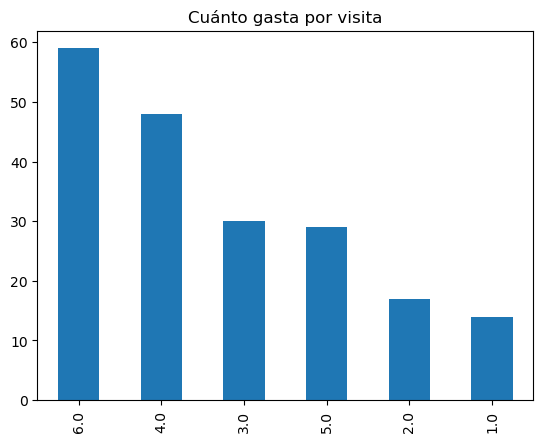

In [18]:
data['P5'].loc[data['P5'] != 99.0].value_counts().plot(kind='bar', title='Cuánto gasta por visita')
plt.show()

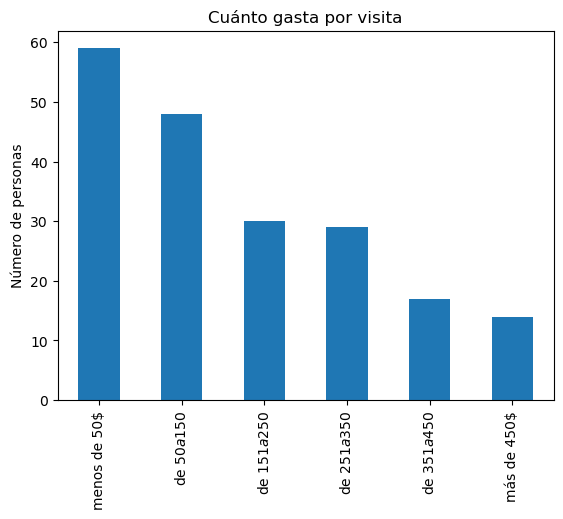

In [25]:
# Filtrar el valor '99.0' y obtener el conteo de valores excluyéndolo
filtered_data = data['P5'].loc[data['P5'] != 99.0]
value_counts = filtered_data.value_counts()

# Graficar los valores
value_counts.plot(kind='bar', title='Cuánto gasta por visita')

# Configurar etiquetas personalizadas para las barras
plt.xticks(range(len(value_counts)), ['menos de 50$', 'de 50$ a 150$', 'de 151$ a 250$', 'de 251$ a 350$', 'de 351$ a 450$', 'más de 450$'])
plt.ylabel('Número de personas')
# Mostrar el gráfico
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

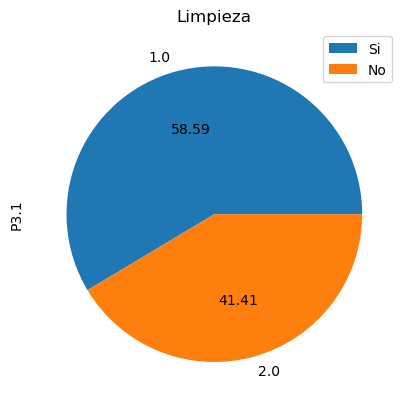

In [31]:
data['P3.1'].value_counts().plot(kind='pie', autopct='%.2f', title='Limpieza')
custom_labels = {1: 'No', 2: 'Si'}

# Crear una lista de etiquetas basada en los valores únicos en tus datos
labels = [custom_labels[val] for val in data['P3.1'].unique()]

# Mostrar la leyenda con las etiquetas personalizadas
plt.legend(labels=labels, loc="best")
plt.show

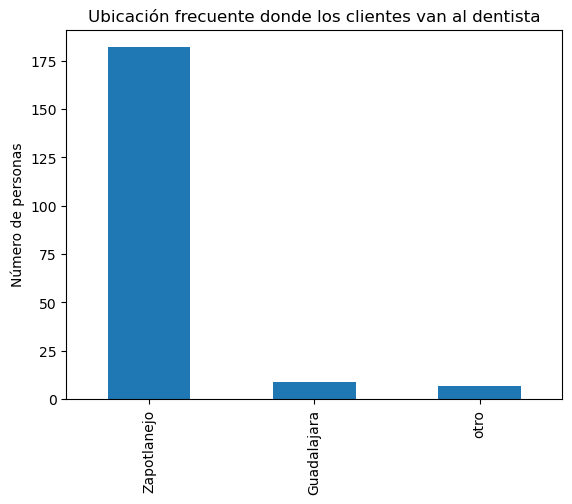

In [42]:
data['P1.3'].value_counts().plot(kind='bar', title='Ubicación frecuente donde los clientes van al dentista')
plt.xticks(range(len(['zapotlanejo', 'Guadalajara', 'otro'])), ['Zapotlanejo', 'Guadalajara', 'otro'])
plt.ylabel('Número de personas')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

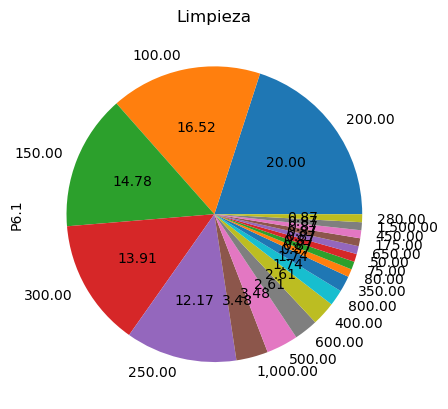

In [53]:
data['P6.1'].value_counts().plot(kind='pie', autopct='%.2f', title='Limpieza')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

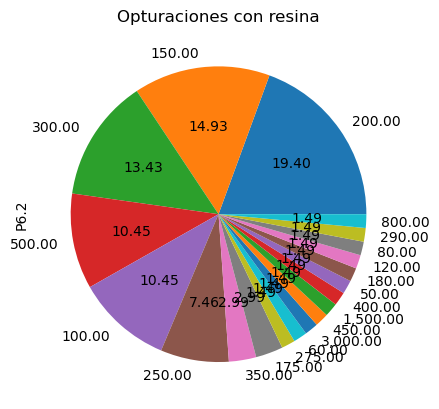

In [54]:
data['P6.2'].value_counts().plot(kind='pie', autopct='%.2f', title='Opturaciones con resina')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

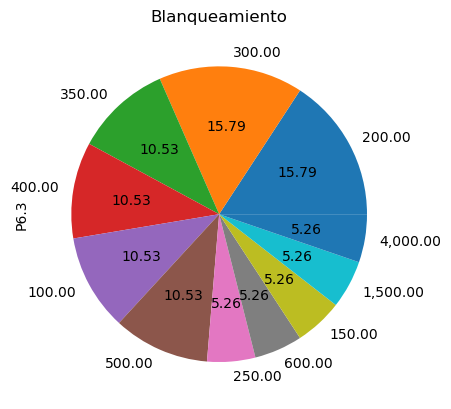

In [55]:
data['P6.3'].value_counts().plot(kind='pie', autopct='%.2f', title='Blanqueamiento')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

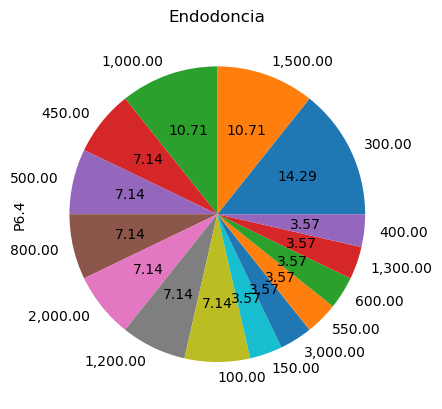

In [56]:
data['P6.4'].value_counts().plot(kind='pie', autopct='%.2f', title='Endodoncia')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

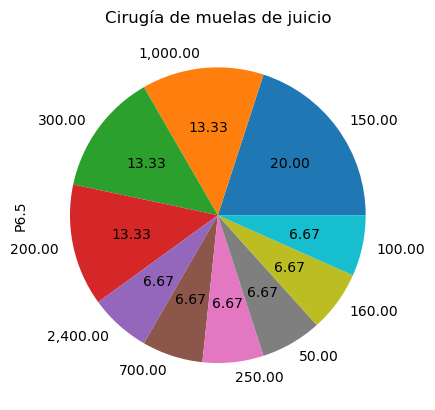

In [57]:
data['P6.5'].value_counts().plot(kind='pie', autopct='%.2f', title='Cirugía de muelas de juicio')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

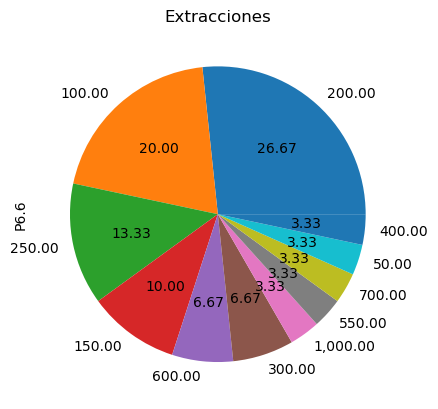

In [58]:
data['P6.6'].value_counts().plot(kind='pie', autopct='%.2f', title='Extracciones')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

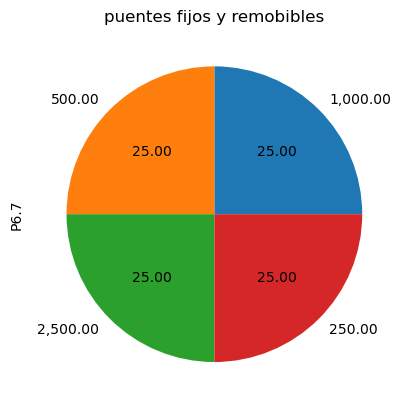

In [59]:
data['P6.7'].value_counts().plot(kind='pie', autopct='%.2f', title='puentes fijos y remobibles')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

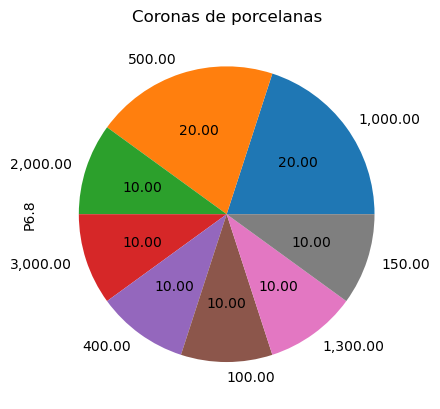

In [60]:
data['P6.8'].value_counts().plot(kind='pie', autopct='%.2f', title='Coronas de porcelanas')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

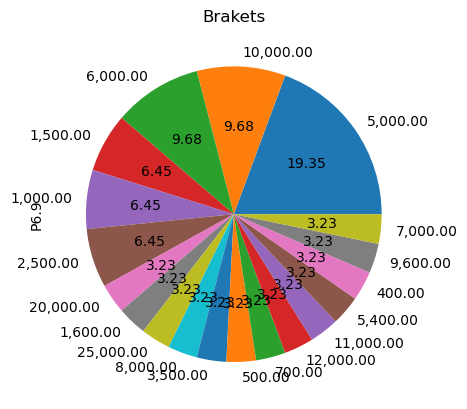

In [61]:
data['P6.9'].value_counts().plot(kind='pie', autopct='%.2f', title='Brakets')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

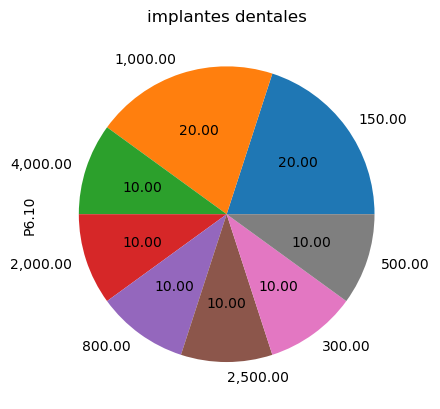

In [62]:
data['P6.10'].value_counts().plot(kind='pie', autopct='%.2f', title='implantes dentales')
plt.show